In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
sg90 = pd.read_excel("SG90_TimWehnes_26082024.xlsx")
df = pd.read_csv("FINAL_SPECIES_RAW.csv")

In [33]:
physicals = [column for column in sg90.columns if column.startswith("phy")]

In [34]:
hsl = [column for column in sg90[physicals] if column.startswith("phy_perf_hsl")]
hsr = [column for column in sg90[physicals] if column.startswith("phy_perf_hsr")]
for ind, row in sg90[physicals].iterrows():
    if row['phy_perf_hand'] == 1.0:
        row[hsr] = np.nan
    else:
        row[hsl] = np.nan

sg90["gripstrength"] = sg90[hsl + hsr].median(axis=1)

In [35]:
sg90["gripstrength"]

0         NaN
1       16.25
2       25.25
3       17.25
4       14.80
        ...  
1153    11.00
1154    21.00
1155    13.50
1156      NaN
1157      NaN
Name: gripstrength, Length: 1158, dtype: float64

In [46]:
# Ensure all identifiers in sg90 and df are converted to string format
sg90["subno_str"] = sg90["subno"].astype(str)
sg90["f4_no_str"] = sg90["f4_no"].apply(lambda x: str(int(x)) if pd.notnull(x) else "")
sg90["subno_schs_str"] = sg90["subno_schs"].astype(str)
sg90["alt_ID_str"] = sg90["alt_ID"].apply(lambda x: str(int(x)) if pd.notnull(x) else "")

# Convert "Feature_ID" column in df to string for comparison
df["Feature_ID_str"] = df["Sample_ID"].astype(str)

# Initialize a list to collect matching rows with the identifier that matched
matches = []

# Iterate over each row in sg90 to check for matches and track the matching identifier
for _, row in sg90.iterrows():
    matched_id = None
    if row["subno_str"] in df["Feature_ID_str"].values:
        matched_id = row["subno_str"]
    elif row["f4_no_str"] in df["Feature_ID_str"].values:
        matched_id = row["f4_no_str"]
    elif row["subno_schs_str"] in df["Feature_ID_str"].values:
        matched_id = row["subno_schs_str"]
    elif row["alt_ID_str"] in df["Feature_ID_str"].values:
        matched_id = row["alt_ID_str"]
    
    # If a match was found, add the row to the matches list with the matched identifier
    if matched_id:
        matches.append({
            "Sample_ID": matched_id,
            "gripstrength": row["gripstrength"]
        })

# Convert the list of matches to a DataFrame
gripstrength_matching_rows = pd.DataFrame(matches)


#seems to be 1 duplicate ID
gripstrength_matching_rows = gripstrength_matching_rows.drop_duplicates(subset="Sample_ID")

# Display 
gripstrength_matching_rows


,Sample_ID,gripstrength
0,90133,14.80
1,90150,13.85
2,90189,27.30
3,2624,18.35
4,90132,10.00
...,...,...
308,90313,11.00
309,90314,14.00
310,90317,11.00
311,90318,21.00


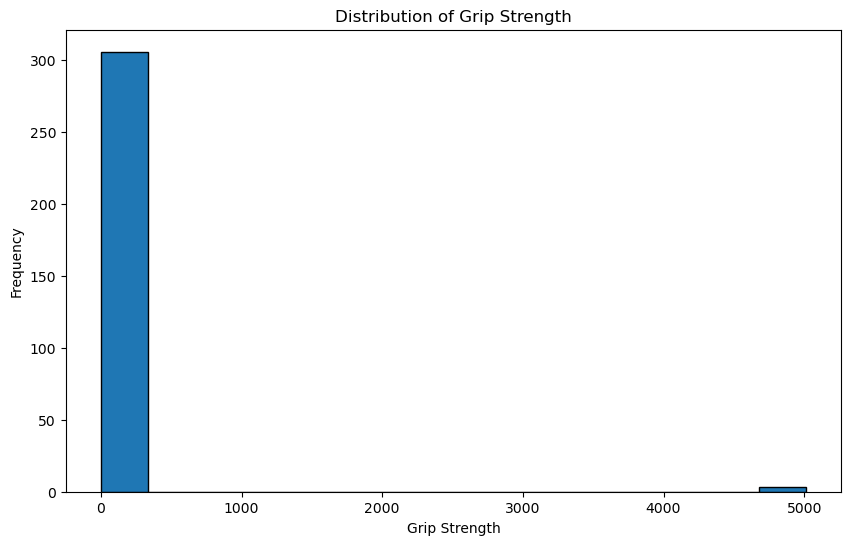

In [50]:
# Plot the distribution of gripstrength values
plt.figure(figsize=(10, 6))
plt.hist(gripstrength_matching_rows["gripstrength"], bins=15, edgecolor="black")
plt.xlabel("Grip Strength")
plt.ylabel("Frequency")
plt.title("Distribution of Grip Strength")
plt.show()

In [51]:
# Identify outliers (values above 1000) and replace them with the median of the 'gripstrength' column
outlier_condition = gripstrength_matching_rows["gripstrength"] > 1000
median_gripstrength = gripstrength_matching_rows["gripstrength"].median()

# Apply median imputation for outliers
gripstrength_matching_rows.loc[outlier_condition, "gripstrength"] = median_gripstrength

# Verify the imputation
gripstrength_matching_rows[outlier_condition]

,Sample_ID,gripstrength
42,90173,14.6
149,53795,14.6
227,80019,14.6


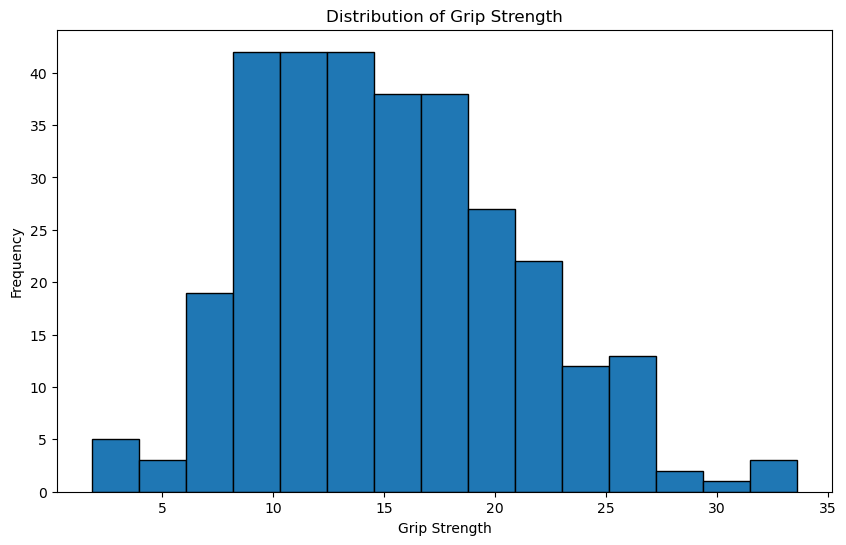

In [52]:
# Plot the distribution of gripstrength values
plt.figure(figsize=(10, 6))
plt.hist(gripstrength_matching_rows["gripstrength"], bins=15, edgecolor="black")
plt.xlabel("Grip Strength")
plt.ylabel("Frequency")
plt.title("Distribution of Grip Strength")
plt.show()

In [54]:
gripstrength_matching_rows.to_csv("gripstrength.csv", index = False)